In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
milk= pd.read_csv("milk.csv",index_col=0)
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [5]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(milk)

In [6]:
prcomp=PCA()

In [7]:
scores=prcomp.fit_transform(scaled_data)

In [8]:
v_covar=np.cov(scaled_data,rowvar=False)

In [9]:
values,vectors=np.linalg.eig(v_covar)
print("Eigen values=",values)

Eigen values= [4.0404117  0.92437238 0.00656977 0.13429088 0.1026886 ]


In [11]:
print("Variances of scores=",np.var(scores,axis=0,ddof=1))

Variances of scores= [4.0404117  0.92437238 0.13429088 0.1026886  0.00656977]


In [10]:
print(prcomp.explained_variance_)

[4.0404117  0.92437238 0.13429088 0.1026886  0.00656977]


In [12]:
scores.shape

(25, 5)

In [13]:
milk.shape

(25, 5)

In [14]:
tot_var=np.sum(prcomp.explained_variance_)

In [15]:
print("% age variations: ")
print((prcomp.explained_variance_/tot_var)*100)

% age variations: 
[77.57590469 17.74794969  2.57838496  1.97162103  0.12613963]


In [16]:
print("Cumulative % age variations explained:")
print(np.cumsum(prcomp.explained_variance_ratio_*100))

Cumulative % age variations explained:
[ 77.57590469  95.32385438  97.90223934  99.87386037 100.        ]


In [19]:
!pip install pca

  Obtaining dependency information for pca from https://files.pythonhosted.org/packages/56/8b/79616adec3aee4b46cd736daac10a70c50b70c00eb687ba738ff79980d02/pca-2.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for datazets from https://files.pythonhosted.org/packages/f0/37/ff89984f6c59ddcbd987886dbcca61a34985a87475d4db82159974ce0440/datazets-0.1.9-py3-none-any.whl.metadata
  Obtaining dependency information for colourmap>=1.1.15 from https://files.pythonhosted.org/packages/05/37/10bb10d990a6c986d25c5c7407ad740ee0cf047a6a0a1f297b0b92e3caaf/colourmap-1.1.16-py3-none-any.whl.metadata
  Obtaining dependency information for scatterd>=1.3.7 from https://files.pythonhosted.org/packages/6a/a9/76be12419fe5475ac69fa9856e1a33df2a73c11bf2fa4a2365b0fa12f371/scatterd-1.3.7-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 524.1 kB/s eta 0:00:00eta 0:00:010:00:01


In [21]:
from pca import pca

[scatterd] >INFO> Create scatterplot


[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


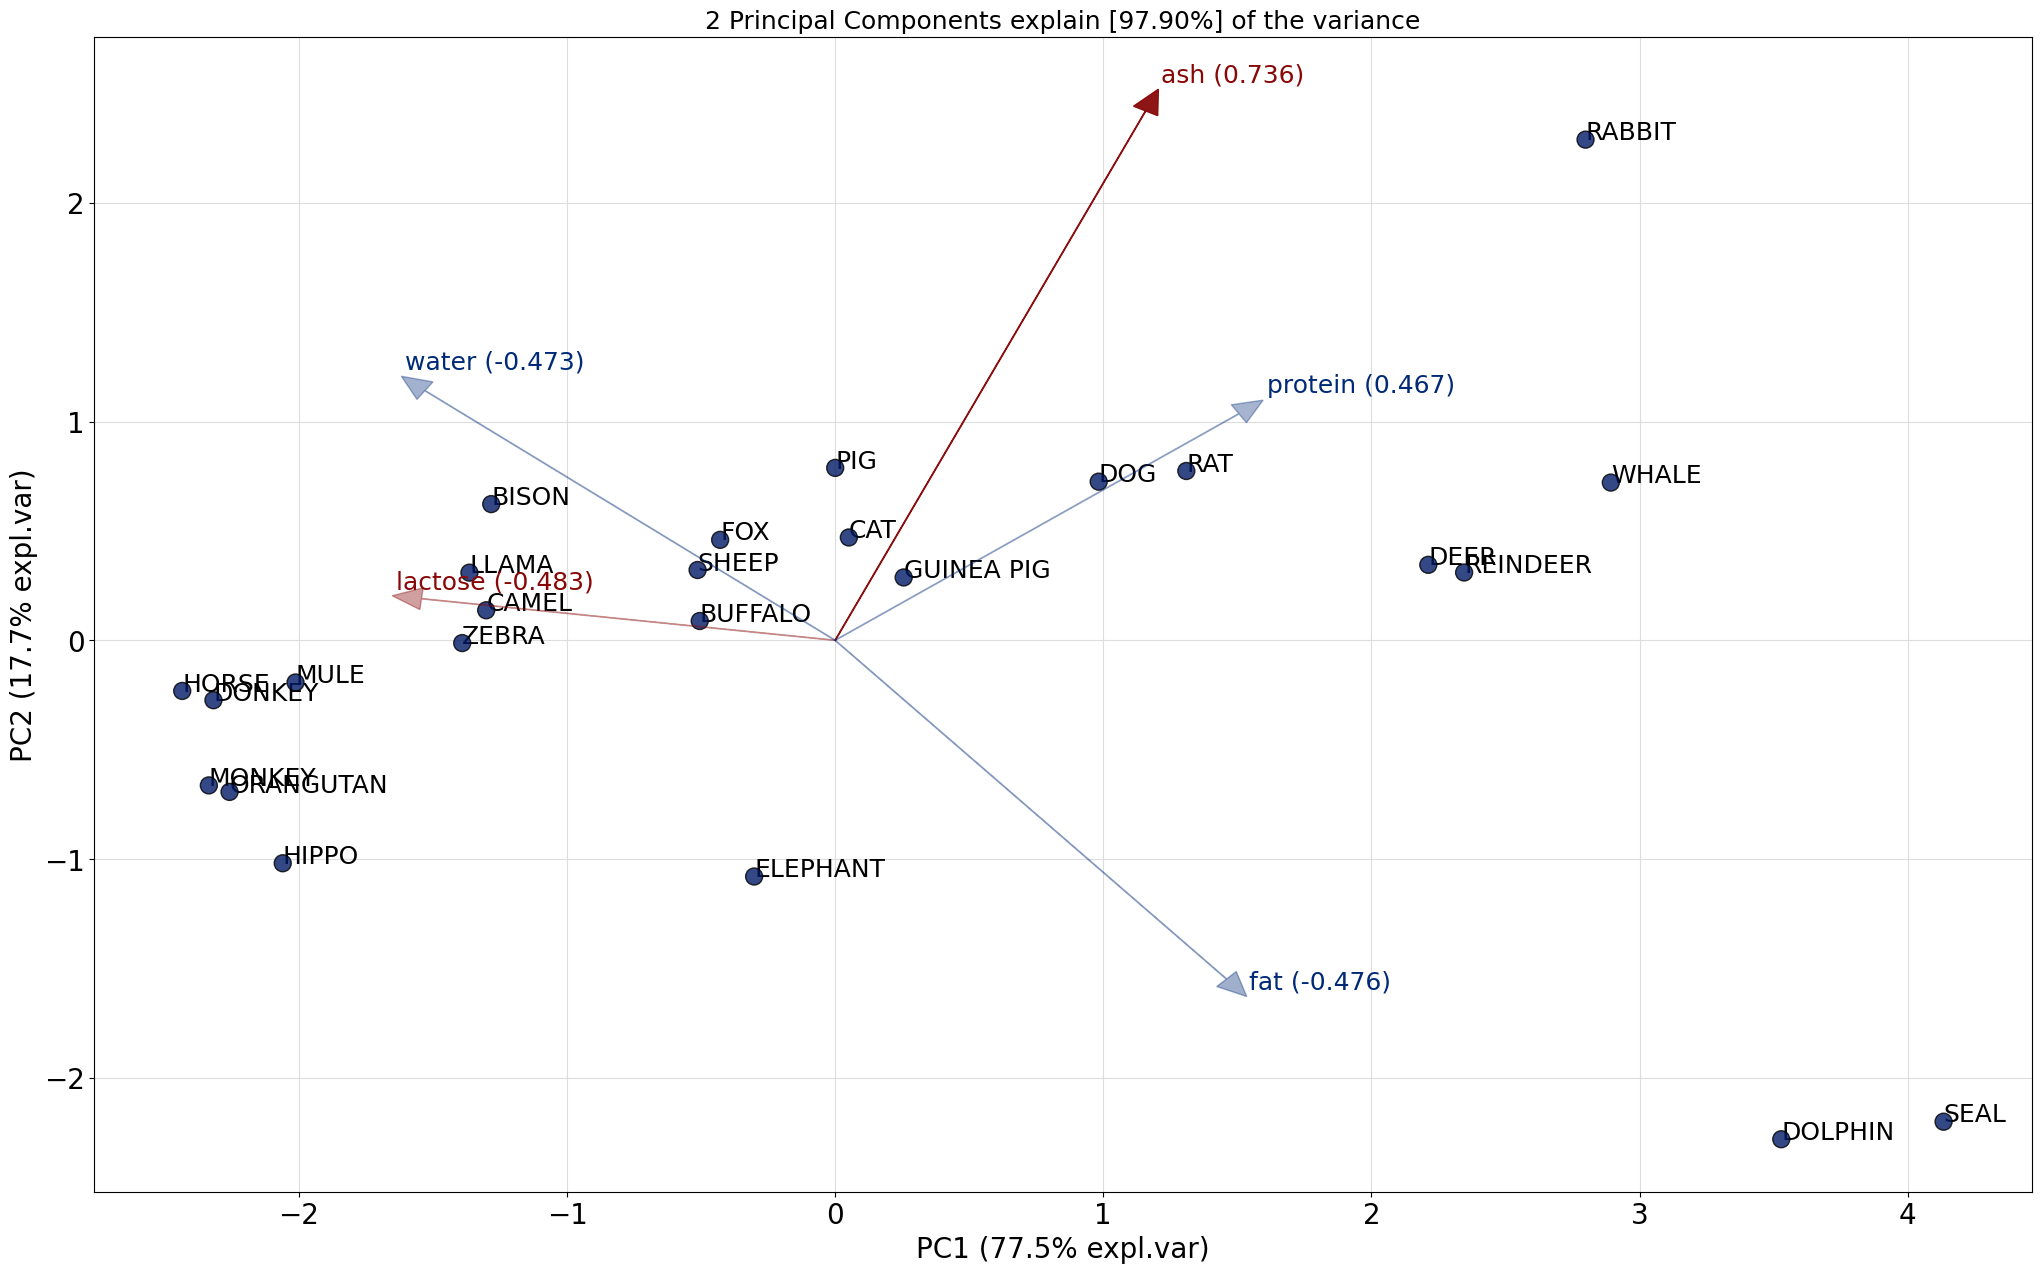

In [25]:
model=pca()
results=model.fit_transform(scaled_data,col_labels=milk.columns,row_labels=list(milk.index))
model.biplot(label=True,legend=True)
for i in np.arange(0,25):
    plt.text(scores[i,0],scores[i,1],list(milk.index)[i])
plt.show()